# <span style="color:#33691e;font-size:8vw;font-weight:800;text-shadow:2px 2px 4px #aaa">Mnist Digits Classification BackPropogation</span>
# <span style="font-size:6vw;font-weight:800;text-shadow:2px 2px 10px #aaa">Two Days Faculty Development Programe</span>
## <span style="font-size:5vw;font-weight:800">Alok Pandey <br> Ashvini Jangid</span>
## <span style="font-size:5vw;font-weight:800"><a href="https://imjangid.xyz">ashvinijangid@gmail.com</a></span>

## Import Libs

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import choice
from warnings import filterwarnings
import os
filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Load Dataset

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Sample Data

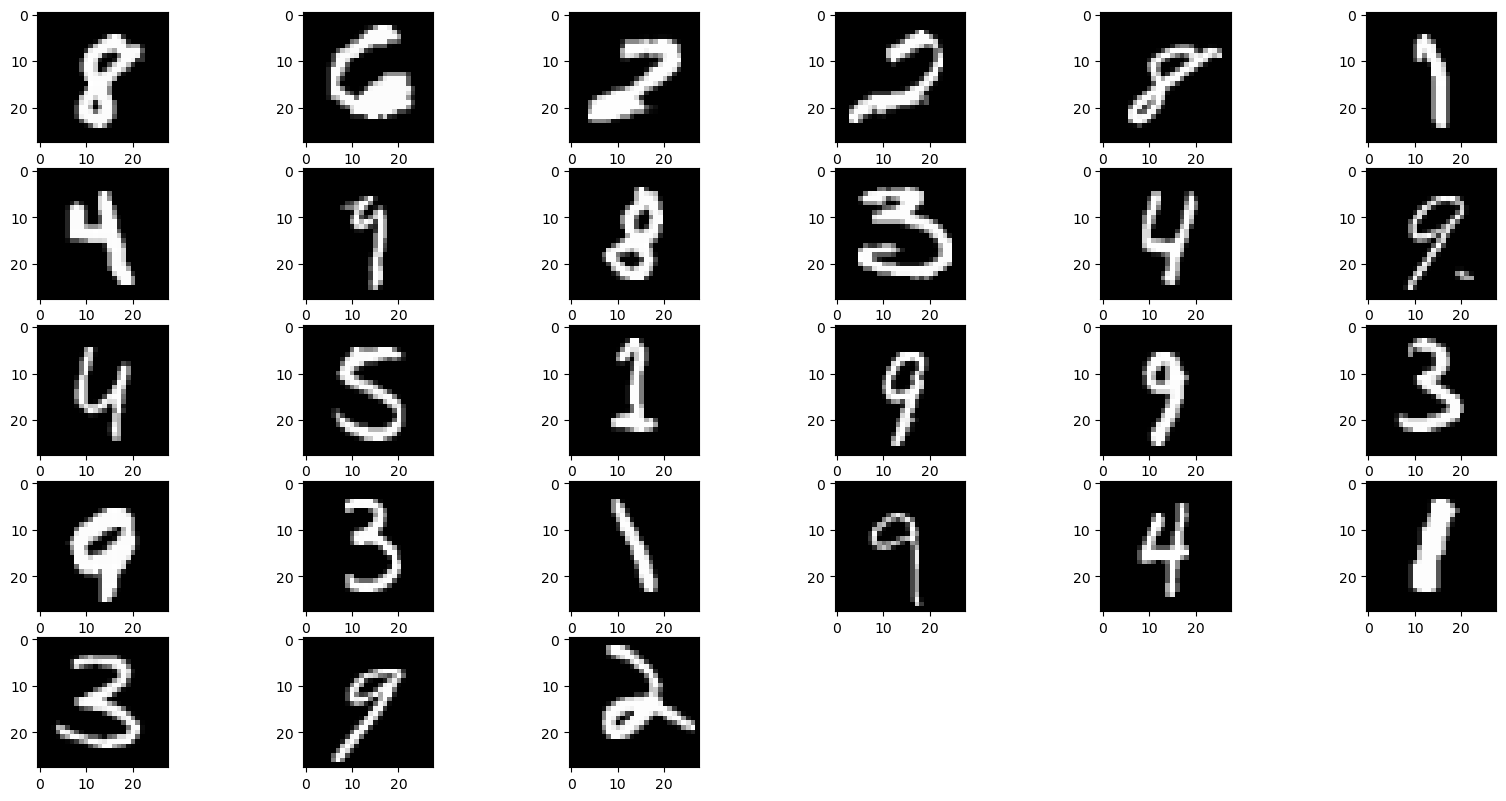

In [10]:
fig = plt.figure(figsize=(20, 10), dpi=100)
for i in range(1, 28):
    ax = plt.subplot(5, 6, i)
    x = choice(x_train)
    ax.imshow(x, cmap="gray")

# Model Create & Compile

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train & Eval Model

In [12]:
model.fit(x_train, y_train, epochs=1)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.1022 - acc: 0.9704


[0.10224762456007302, 0.9704]

# Tesing the Model 

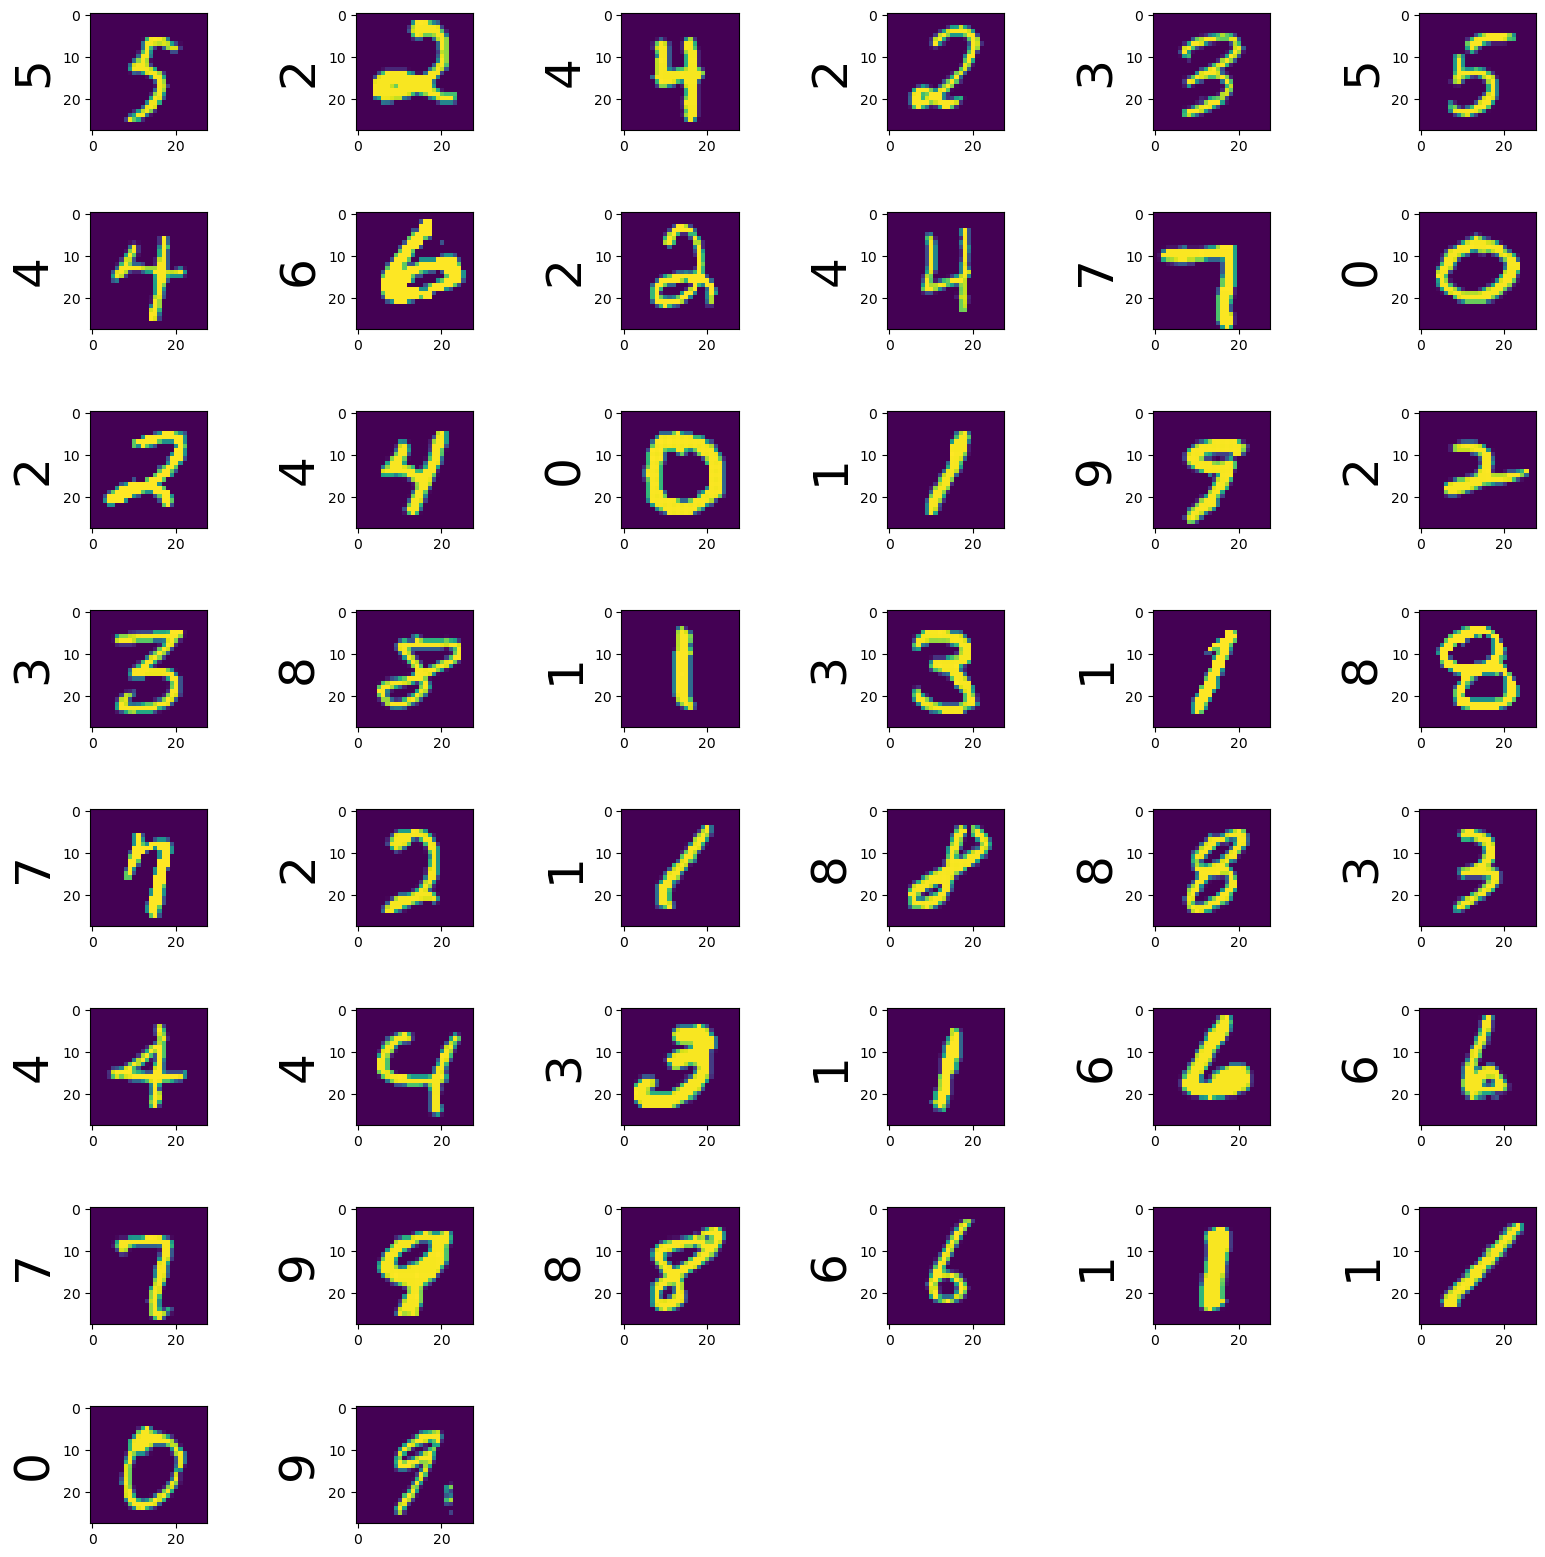

In [13]:
fig = plt.figure(figsize=(20, 20), dpi=100)
plt.subplots_adjust(hspace=0.7)
for i in range(1, 45):
    ax = plt.subplot(8, 6, i)
    x = choice(x_train)
    p = np.argmax(model.predict([[x]]))
    ax.imshow(x)
    ax.set_ylabel(str(p), fontsize=35)

# Save Model For Later Use

In [ ]:
model.save("save_model")

# Load Model From Saved Location

In [ ]:
model.load_weights("save_model")